# Example 1 - Preaparing and Visualizing Inputs of EXSIM12

First, we arrange the working directory with the os module, and then we import pyexsim12, pyplot and numpy

In [1]:
import os
os.chdir('C:\\Users\\abdul\\Desktop\\Ders\\Python\\pyexsim12')

import pyexsim12 as pex
import matplotlib.pyplot as plt
import numpy as np

In order to run a ground motion simulation with pyexsim12, we first need to create several objects for our simulation case, representing different components. These objects are:
- Source()
- Path()
- Amplification()
- Misc()
- Sites()

First we will create the Source object. A Source object requires 4 inputs for initialization, which can be seen by calling the help function on Source class as: ```help(pex.Source)```. These 4 inputs are:
- source_spec - SourceSpec(mw, stress_drop, kappa, kappa_flag)
- fault_geom - FaultGeom(fault_edge, angles, fault_type, len_width)
- hypo - Hypocenter(hypo_along_fault, hypo_down_dip)
- rupture - Rupture(vrup_beta, slip_weights)

In the cell below, we create each of these 4 input objects along with a custom slip matrix. We save this custom slip matrix with the ```simulation.create_slip_file(slip_matrix, slip_weights)``` method. We then pass this slip file into the Rupture object. Finally, we create the Source object with all the four inputs, and print the object to see key information.

In [2]:
# %% Creating the Source object
src_spec = pex.SourceSpec(mw=7.0, stress_drop=100, kappa=0.03)  # kappa_flag = 1 by default, so no need to change anything
fault_geom = pex.FaultGeom(fault_edge=(0, 0),
                           angles=[180.0, 90.0, 5.0],
                           fault_type="S",
                           len_width=[65.0, 25.0, 5.0, 5.0, 70.0])
hypo = pex.Hypocenter(hypo_along_fault=-1, hypo_down_dip=-1)  # Random hypocenter
# Create the slip file
# First we will create a matrix of slip weights. Since we have 65/5=13 subfaults along the length, and 25/5=5 along the
# width, dimensions of the array will be 5 x 13.
slip_matrix = np.array([[0.4, 0.6, 1.2, 1.35, 1.05, 1.2, 0.8, 1.2, 1.8, 1.7, 1.3, 0.9, 0.6],
                        [0.4, 0.9, 1.3, 1.4, 2.0, 1.8, 1.1, 1.8, 2.7, 2.6, 1.9, 1.3, 0.75],
                        [0.28, 0.55, 0.9, 1.2, 1.5, 1.7, 1.2, 2.1, 2.6, 2.4, 1.8, 1.2, 0.75],
                        [0.1, 0.25, 0.6, 0.7, 1.05, 1.35, 1.5, 1.95, 2.1, 1.6, 1.05, 0.75, 0.6],
                        [0.1, 0.1, 0.3, 0.45, 0.5, 0.7, 1.0, 1.2, 1.2, 0.6, 0.3, 0.2, 0.1]])
# Now we will pass this array into the create_slip_file method of simulation module. Since exsim is located at the
# folder "exsim12", which is the default argument for the exsim_folder parameter, we will leave it as default.
pex.simulation.create_slip_file(slip_matrix=slip_matrix, filename="slip_weights.txt")
rupture = pex.Rupture(vrup_beta=0.8, slip_weights="slip_weights.txt")
src = pex.Source(src_spec, fault_geom, hypo, rupture)

# Print the recently created src object to see basic information:
print(src)

Mw: 7.0
Stress drop: 100 bars
kappa: 0.03 s
Strike: 180.0°
Dip: 90.0°
Depth: 5.0 km


In the cell below, we create the Path object with 5 inputs:
- time_pads - TimePads(tpad1, tpad2, delta_t)
- crust - Crust(beta, rho)
- geometric_spreading - GeometricSpreading(n_seg, spread)
- quality_factor - QualityFactor(q_min, q_zero, eta)
- path_duration - PathDuration(n_dur, r_dur, dur_slope)

In [3]:
# %% Creating the Path object

time_pads = pex.TimePads(tpad1=20.0, tpad2=20.0, delta_t=0.01)
crust = pex.Crust(beta=3.7, rho=2.8)
geom_spread = pex.GeometricSpreading(n_seg=3, spread=[(1.0, -1.0), (30.0, -0.6), (50.0, -0.5)])
q_factor = pex.QualityFactor(q_min=0.0, q_zero=88, eta=0.9)
path_dur = pex.PathDuration()  # No input is provided as the default values will be used
path = pex.Path(time_pads, crust, geom_spread, q_factor, path_dur)

The Amplification object only requires three inputs, filenames of site, crustal and empirical amplification files.
These files can created with ```simulation.create_amp ``` method, or they can be manually prepared, in which case the corresponding filename should be passed as an input argument to the Amplification object. Here, we create custom amplification files for site and crustal amplification. We do not pass in an argument for the empirical amplification file, which will have the default value of ```empirical_amps.txt```, which is the file distributed with EXSIM12 with no empirical amplification.

In [4]:
# %% Creating amplification files and Amplification object
pex.simulation.create_amp(freq=[0.1953, 0.9766, 5.859, 8.887, 11.72],
                      amp=[5.115, 7.155, 0.7477, 0.5308, 0.2812],
                      filename="site_amp_tutorial.txt",
                      header="Site amplification file for pyexsim12 tutorial")

pex.simulation.create_amp(freq=[0.01, 0.1, 0.2, 0.3, 0.5, 0.9, 1.25, 1.8, 3.0, 5.3, 8.0, 14.0],
                      amp=[1.0, 1.02, 1.03, 1.05, 1.07, 1.09, 1.11, 1.12, 1.13, 1.14, 1.15, 1.15],
                      filename="crustal_amp_tutorial.txt",
                      header="Crustal amplification file for pyexsim12 tutorial")

amp = pex.Amplification(site_amp="site_amp_tutorial.txt", crustal_amp="crustal_amp_tutorial.txt")

Finally, we create the Misc and Sites objects. We do not provide any arguments for the Misc object and keep everything as default. And we provide the coordinates for only one site for the Sites object.

In [5]:
# %% Create Misc and Sites objects

misc = pex.Misc()  # Everything will be kept as default
sites = pex.Sites([(5, 30)], site_coord_flag=2)  # Only one site will be used for demonstration (at 5 km distance, 30 degrees)

Now the Simulation object is ready for initialization. After creating the Simulation object with the name of "sim", we create the input file with ```sim.create_input_file``` method. After the Simulation object is ready, we can visualize the slip distribution with the sim.plot_slip() method.

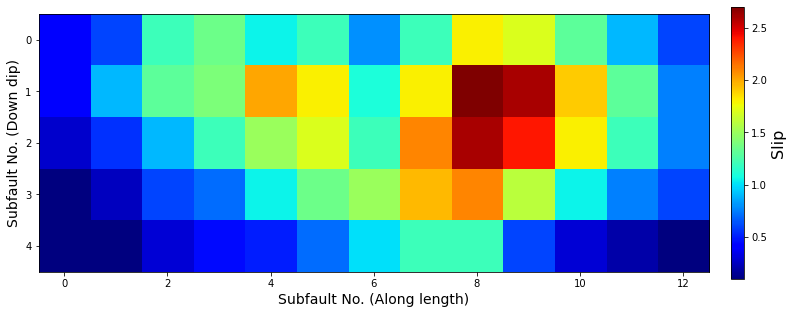

In [6]:
# %% Now the Simulation object is ready for initialization.
sim = pex.Simulation(src, path, amp, misc, sites)
sim.create_input_file(save=True)  # Create the input file for EXSIM12

# Plot the slip distribution:
_ = sim.plot_slip()

Next, we plot site and crustal amplifications, quality factor and geometric spreading functions with the methods:
- pyexsim12.Amplification.plot_site_amp()
- pyexsim12.Amplification.plot_crustal_amp()
- pyexsim12.QualityFactor.plot()
- pyexsim12.GeometricSpreading.plot()

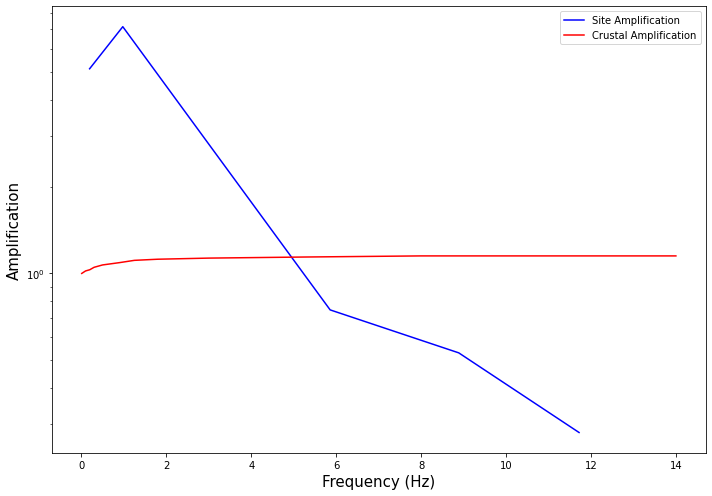

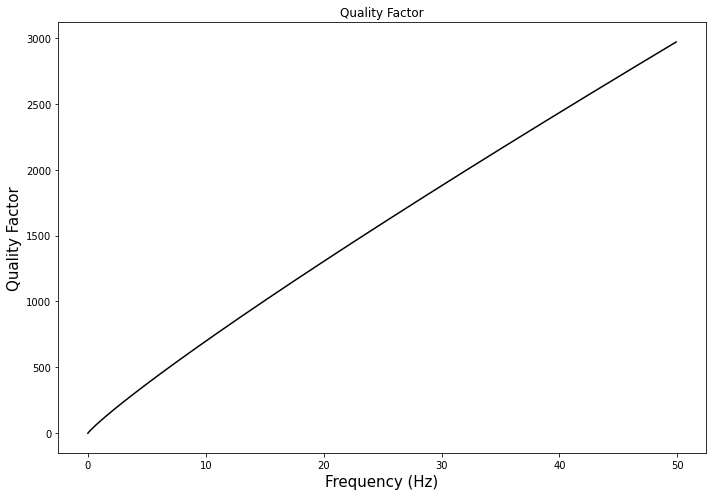

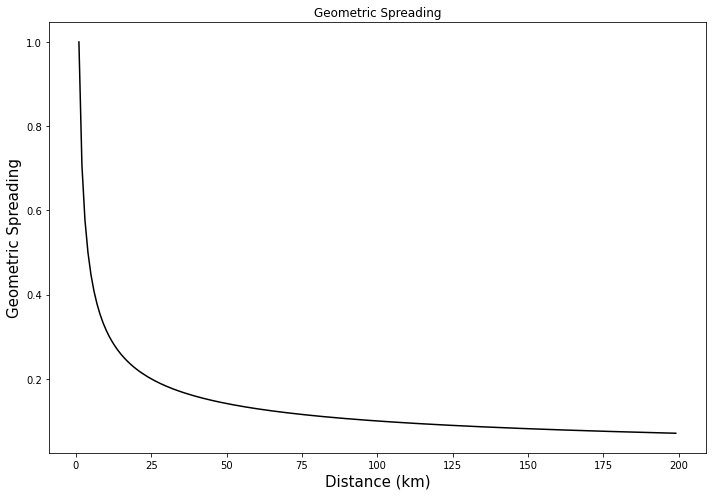

In [7]:
# Plot site and crustal amplifications:
fig_amp, axs_amp = plt.subplots(figsize=(10, 7))
amp.plot_site_amp(axis=axs_amp, plot_dict={"label": "Site Amplification", "color": "blue"})
amp.plot_crustal_amp(axis=axs_amp, plot_dict={"label": "Crustal Amplification", "color": "red"})
axs_amp.legend()
axs_amp.set_xlabel("Frequency (Hz)", fontsize=15)
axs_amp.set_ylabel("Amplification", fontsize=15)
axs_amp.set_yscale("log")
plt.tight_layout()

# Plot quality factor function
q_factor.plot(plot_dict={"color": "black"}).set_size_inches(10, 7)
plt.xlabel("Frequency (Hz)", fontsize=15)
plt.ylabel("Quality Factor", fontsize=15)
plt.tight_layout()
# Plot geometrical spreading function
_ = geom_spread.plot(plot_dict={"color": "black"}).set_size_inches(10, 7)
plt.xlabel("Distance (km)", fontsize=15)
plt.ylabel("Geometric Spreading", fontsize=15)
plt.tight_layout()


Finally, we will run the simulation and plot the simulated accelerogram:

C:\Users\abdul\Desktop\Ders\Python\pyexsim12\pyexsim12\simulation.py:414: UserWarning: The simulation has been run before. To override previous results, set override=True while calling the Simulation.run() method
  warnings.warn("The simulation has been run before. To override previous results, set "


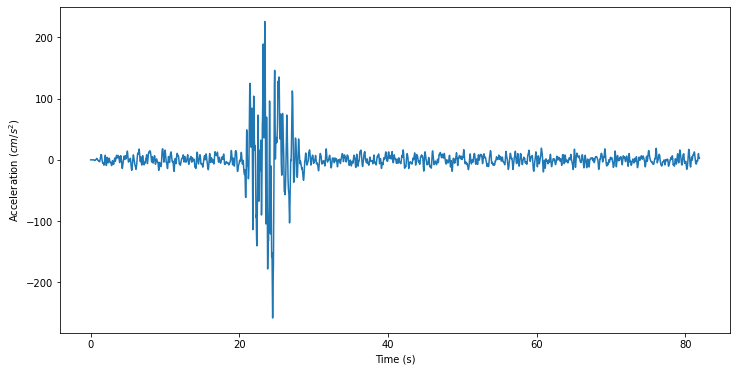

In [8]:
sim.run()
_ = sim.plot_acc(site=1).set_size_inches(12, 6)